# Generating Bus stop density metric data frame (300 metre radius)

A potentially helpful feature of a bus stop and its associated evasion rate could be its density metric 

Given that it indicates a popular destination 



In [1]:
import pandas as pd

### All bus stops that exist before and after 2019

In [2]:
# This came from Pipe 4. It represents all of the bus stops present beofre and after 2019 
Unique_stops = pd.read_csv("c:/users/henry chapman/Documents/Coding/Data_science/Project_final/Output/1_Compiling_data/Pipe4/Unique_stops.csv")
Unique_stops.head()

,Stop_ID,Pre_2019
0,7820277-1,True
1,7820088-1,True
2,7820165-1,True
3,7820155-1,True
4,7820014-1,True


### All bus stops present within the GTSF data base and their geographical locations

In [3]:
usecols = ["stop_code", "stop_lat", "stop_lon"]
All_stops = pd.read_csv("c:/users/henry chapman/Documents/Coding/Data_science/Project_final/Raw_data/gtfs/stops.txt", usecols = usecols)
All_stops.rename(columns = {"stop_code" : "Stop_ID"}, inplace = True)

# Dropping those which have co-ordinates FAR outside of tartu area

All_stops = All_stops[
    (All_stops["stop_lat"] > 58.275) &
    (All_stops["stop_lat"] < 59.2) &
    (All_stops["stop_lon"] > 26)
    ]

All_stops.head(5)

,Stop_ID,stop_lat,stop_lon
2,7800232-1,58.322728,26.503363
4,4401153-1,59.009246,27.450464
5,7820139-1,58.358815,26.673276
10,7801039-1,58.300223,26.471328
31,7800516-1,58.289447,26.475457


### Pre_2019 / Post_2019 bus stops and their location

Splitting into pre and post 2019 to ensure the density metric is accurate (their were differnt bus stops before and after 2019)

In [4]:
Pre_2019_stops = Unique_stops[Unique_stops["Pre_2019"] == True]
Post_2019_stops = Unique_stops[Unique_stops["Pre_2019"] == False]

Pre_2019_Merged = Pre_2019_stops.merge(All_stops, left_on = "Stop_ID", right_on = "Stop_ID", how = "inner") 
Pre_2019_Merged.drop_duplicates(subset = ["Stop_ID"], inplace = True)

Post_2019_Merged = Post_2019_stops.merge(All_stops, left_on = "Stop_ID", right_on = "Stop_ID", how = "inner")
Post_2019_Merged.drop_duplicates(subset = ["Stop_ID"], inplace = True)


## Generating Bus stop density metric data frame (300 metre radius)

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree

def Mapping_density(Mapping):
        
    df = Mapping.copy()
    
    # convert from degrees to meters 
    coords = np.radians(df[["stop_lat", "stop_lon"]].to_numpy())
    
    # build BallTree qwith haversine metric 
    tree = BallTree(coords, metric = "haversine")
    
    # query radius 
    radius_m = 300
    earth_radius_m = 6371000
    radius_rad = radius_m / earth_radius_m
    
    counts = tree.query_radius(coords, radius_rad)
    df["density"] = [len(c)-1 for c in counts]
    return df

def Plotting_density(df):
    sns.scatterplot(data = df, x = "stop_lat", y = "stop_lon", hue = "density")
    plt.show()
    

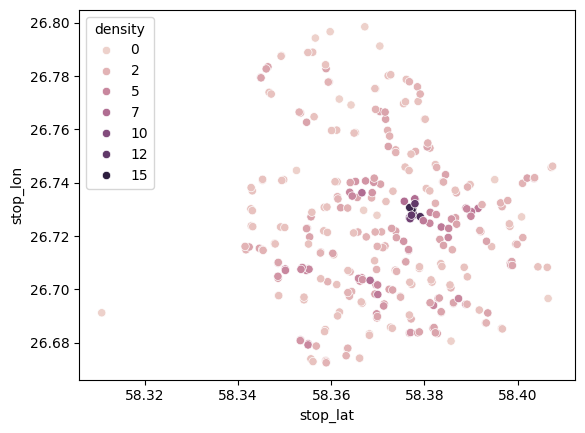

In [6]:

Pre_2019_density = Mapping_density(Pre_2019_Merged)
Plotting_density(Pre_2019_density)


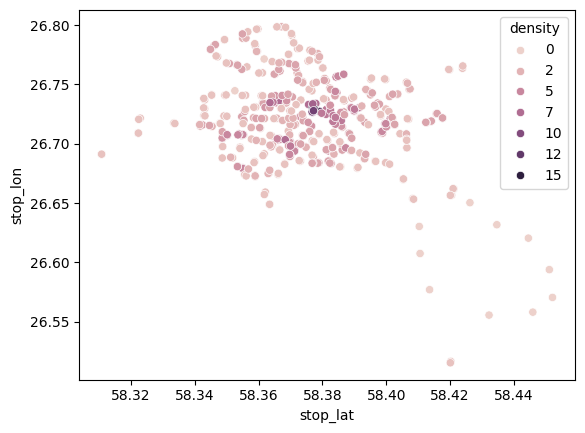

In [7]:
Post_2019_density = Mapping_density(Post_2019_Merged)
Plotting_density(Post_2019_density)

### Concatenating into a single data frame 

In [9]:
Bus_stop_density = pd.concat([Pre_2019_density, Post_2019_density])
Bus_stop_density.head()

,Stop_ID,Pre_2019,stop_lat,stop_lon,density
0,7820277-1,True,58.355053,26.679570,5
1,7820088-1,True,58.377240,26.727902,12
2,7820165-1,True,58.372206,26.780190,1
3,7820155-1,True,58.369511,26.775310,1
4,7820014-1,True,58.370453,26.766704,3


# Exporting

In [10]:
Bus_stop_density.to_csv("C:/users/henry chapman/Documents/Coding/Data_science/Project_final/Output/1_Compiling_data/Pipe6/Bus_stop_density.csv", index = False)